In [89]:
import pandas as pd

df = pd.read_csv('../data/spotify-tracks.csv')
list(df.columns)

['acousticness',
 'analysis_url',
 'danceability',
 'duration_ms',
 'energy',
 'spotify_id',
 'instrumentalness',
 'key',
 'liveness',
 'loudness',
 'mode',
 'speechiness',
 'tempo',
 'time_signature',
 'valence',
 'artist_name',
 'track_name',
 'class']

In [90]:
dict(df.dtypes)

{'acousticness': dtype('float64'),
 'analysis_url': dtype('O'),
 'danceability': dtype('float64'),
 'duration_ms': dtype('int64'),
 'energy': dtype('float64'),
 'spotify_id': dtype('O'),
 'instrumentalness': dtype('float64'),
 'key': dtype('int64'),
 'liveness': dtype('float64'),
 'loudness': dtype('float64'),
 'mode': dtype('int64'),
 'speechiness': dtype('float64'),
 'tempo': dtype('float64'),
 'time_signature': dtype('int64'),
 'valence': dtype('float64'),
 'artist_name': dtype('O'),
 'track_name': dtype('O'),
 'class': dtype('float64')}

In [91]:
df_str = df[['artist_name', 'track_name']]
df_str

,artist_name,track_name
0,Squid,Paddling
1,Kokomo Arnold,Mean Old Twister - Remastered
2,Brynn Elliott,Letter To A Girl
3,LASTELLE,A Letter Unread
4,James Taylor,Fire and Rain
...,...,...
18745,Balmorhea,The Myth
18746,Movement At Night,No Matter What
18747,Mike WiLL Made-It,"Perfect Pint (feat. Kendrick Lamar, Gucci Mane..."
18748,Kelpe,All the Way Round - Edit


In [92]:
DELIMITERS = ["-", ",", ".", ":", "!", "?", "¿", "¡", "/", "*", "+", ""]
WRAPPERS = ["(", ")"]
CONNECTORS = ["the", "feat", "&"]

In [93]:
m, n = df_str.shape
df_values = df_str.values

words = {}
s = ""

for i in range(m):
    column = df_values[i]
    for j in range(n):
        sentence = column[j]
        sentence_splitted = sentence.split(" ")
        for word in sentence_splitted:
            word: str = word.lower()
            for wrapper in WRAPPERS:
                word = word.replace(wrapper, "")
            if word not in DELIMITERS and word not in CONNECTORS:
                word_lower = word.lower()
                s += f"{word_lower} "
                if words.get(word_lower) == None:
                    words[word_lower] = 1
                else:
                    words[word_lower] += 1


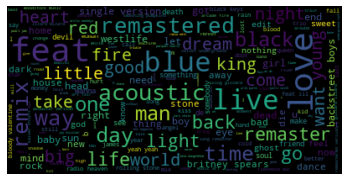

In [94]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud().generate(s)

wordcloud = WordCloud(max_font_size=40).generate(s)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [95]:
dict_words = {
    "words": [k for k in words],
    "appearances": [words[k] for k in words]
}

df_words = pd.DataFrame(dict_words)
df_words.sort_values(by=["appearances"], ascending=False, inplace=True)
df_words

,words,appearances
93,of,960
106,you,830
12,a,723
57,in,713
11,to,670
...,...,...
9308,crawler,1
9307,hardal,1
9306,neo,1
9303,√ä,1


In [96]:
top_500 = df_words.values[:500]

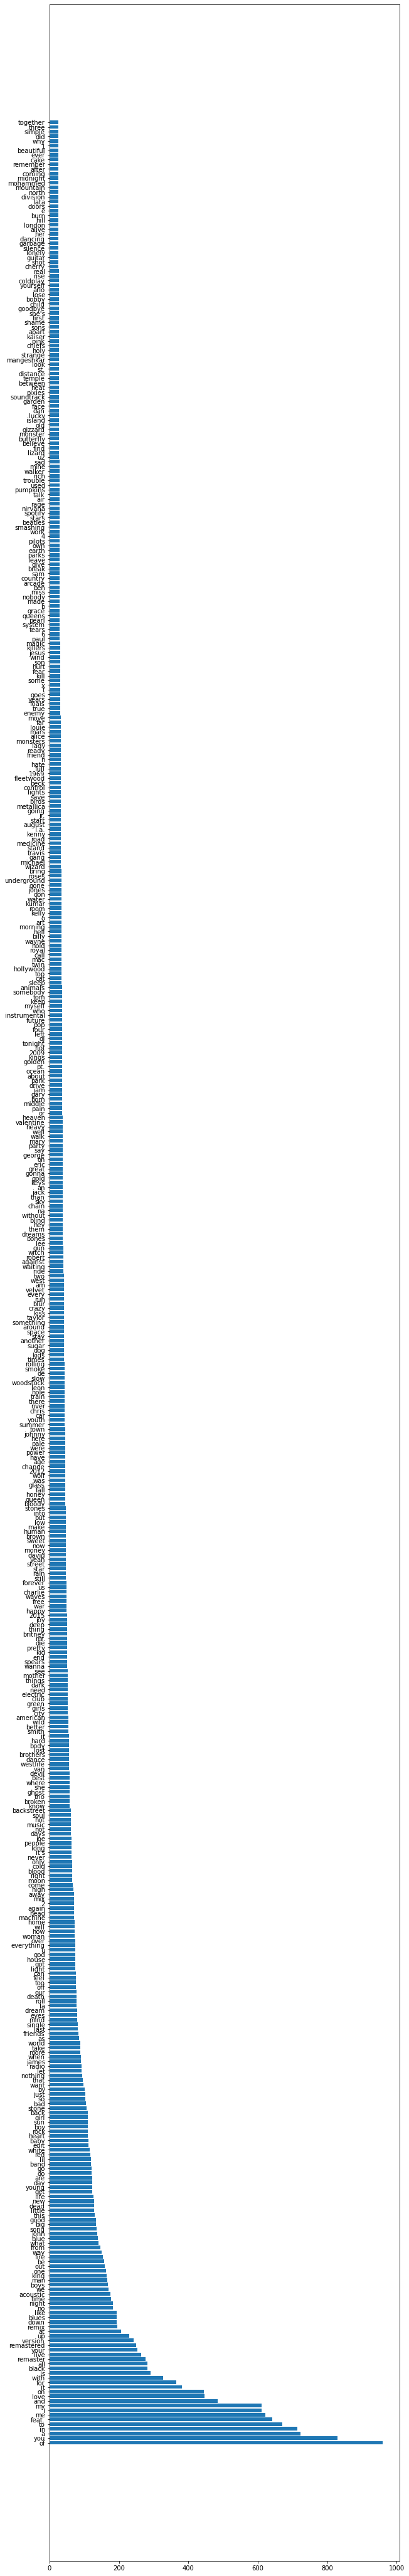

In [97]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,75))

x = []
y = []

for r in top_500:
    x.append(r[0])
    y.append(r[1])

plt.barh(x,y)
plt.show()